In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
sys.path.append('home/egupta/.local/bin')

import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import scipy.stats as ss
import networkx as nx
import csv 
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline


##qtensor imports
import qtensor
from qtensor import QAOA_energy
from qtensor import parameter_optimization as popt

2021-09-16 03:51:33,646- WARNING•	QuickBB solver is unavailable
2021-09-16 03:51:33,648- WARNING•	Tamaki solver is unavailable: No path /home/egupta/.local/lib/python3.7/site-packages/thirdparty/tamaki_treewidth


In [3]:
file1 = open("EnergyLandscapes30405060percent20nodeSep14.txt")
datas = list(np.loadtxt(file1).reshape(40,20,20))

# sort graphs

In [6]:
file2 = open("110_20_node_graphs.txt")
mat_list = list(np.loadtxt(file2).reshape(110,20,20))

def mats_to_graphs(mat_list):
  """
  Given list of adjaceny matrix repr of graphs, converts to actual graphs
  """
  g_list = []
  for mat in mat_list:
    arr = np.array(mat)
    G = nx.convert_matrix.from_numpy_matrix(arr)
    g_list.append(G)
  return g_list

g_list = mats_to_graphs(mat_list)

In [7]:
def even_percent(graph):
  """
  Determines the relative percent of even degree nodes
  """
  nodes = graph.number_of_nodes()
  tot_ev = 0
  for i in range(nodes):
    if graph.degree[i]%2 == 0:
      tot_ev+=1
  return tot_ev/nodes

In [11]:
sorted_datas = [[],[],[],[]]
sorted_graphs = [[],[],[],[]]

imp_graphs = []
j = -1
for i in range(len(g_list)):
    graph = g_list[i]
    k = even_percent(graph)
    if k in [0.3,0.4,0.5,0.6]:
        imp_graphs.append(i)
        j+=1
        sorted_datas[int(k*10 -3)].append(datas[j])
        sorted_graphs[int(k*10 -3)].append(graph)
len(imp_graphs)

40

In [17]:
def find_av_datas(datas):
    """
    GIvena list of 20x20 matrices, averages over them
    """
    new_mat = np.zeros((20,20))
    for i in range(20):
        for j in range(20):
            l = 0
            for k in range(len(datas)):
                l+= datas[k][i][j]
            new_mat[i][j] = l/len(datas)
    return new_mat
            

# 30 node

In [14]:
k = 0

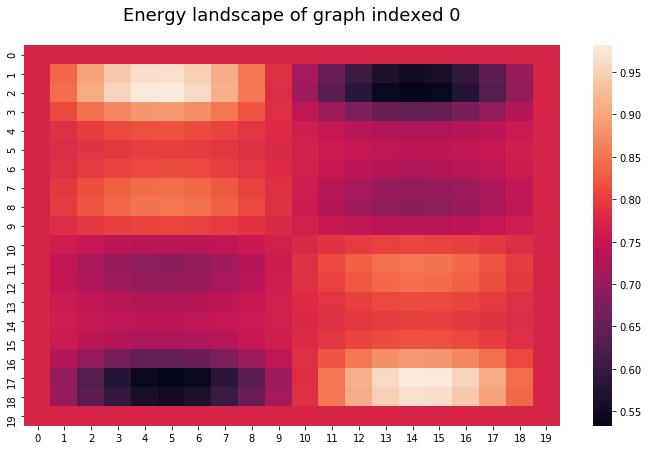

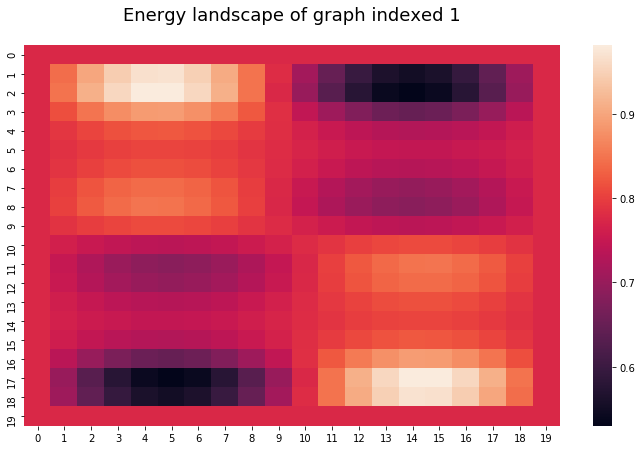

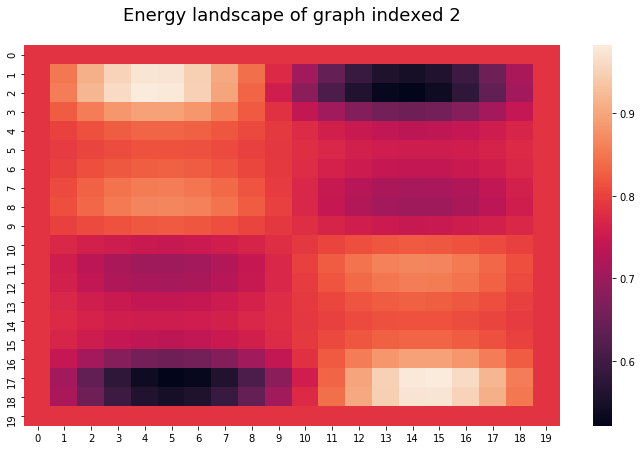

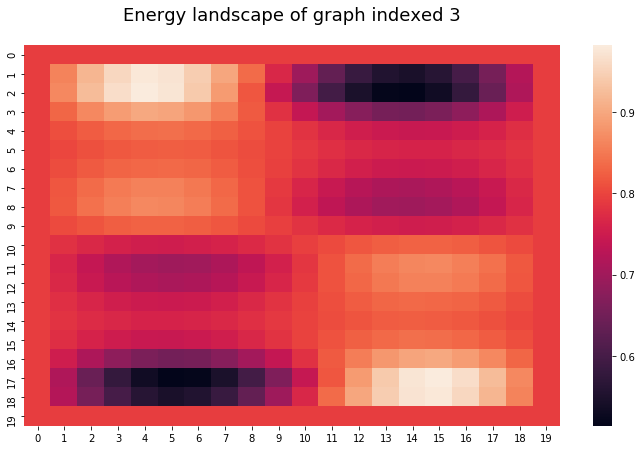

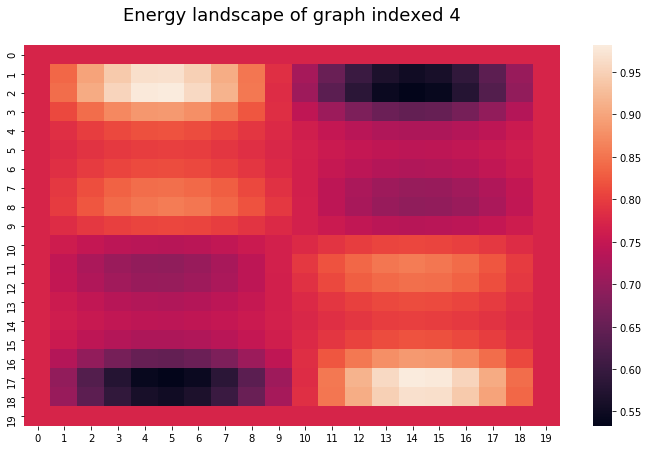

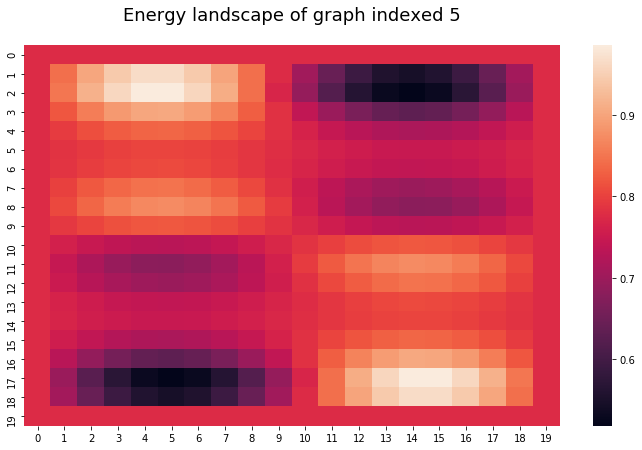

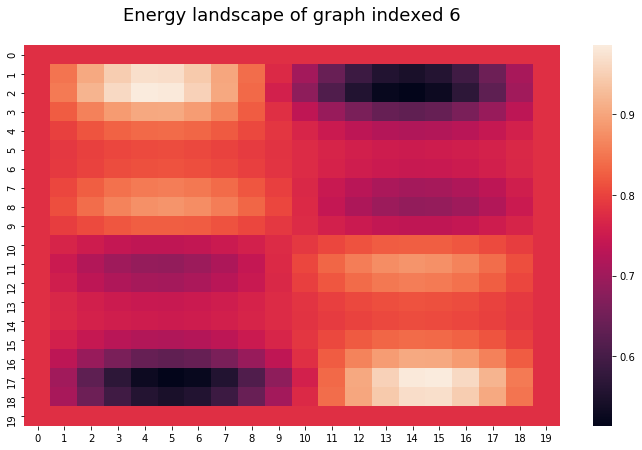

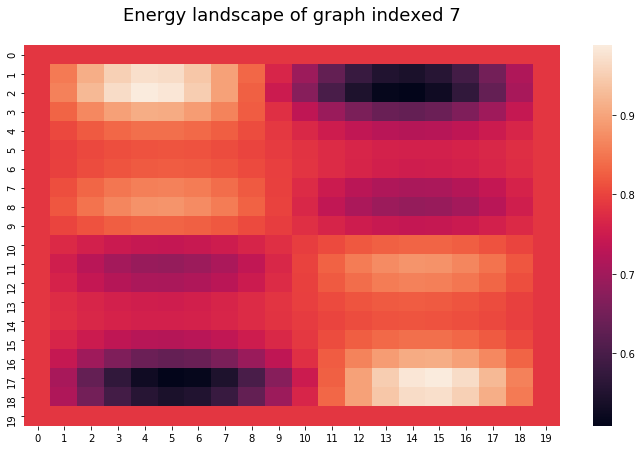

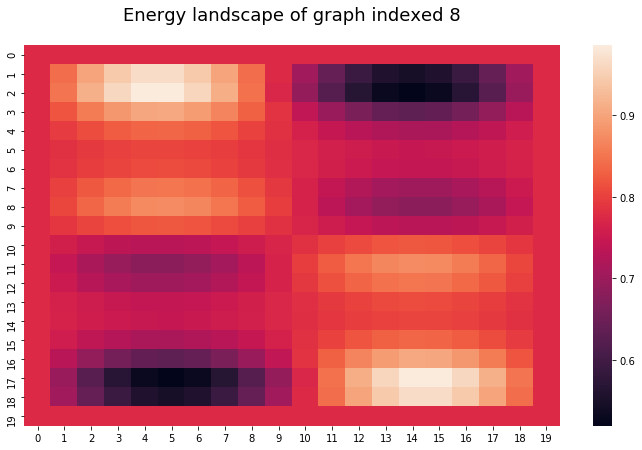

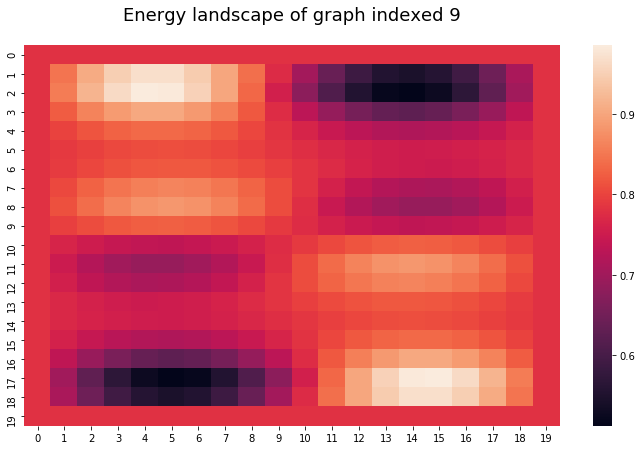

[2, 4, 4, 4, 6, 6, 5, 3, 5, 1, 5, 3, 3, 5, 1, 5, 5, 3, 3, 1]
[2, 4, 4, 4, 6, 6, 5, 3, 5, 1, 5, 3, 3, 5, 1, 5, 5, 3, 3, 1]
[2, 4, 4, 4, 6, 6, 5, 3, 5, 1, 5, 3, 3, 5, 1, 5, 5, 3, 3, 1]
[2, 4, 4, 4, 6, 6, 5, 3, 5, 1, 5, 3, 3, 5, 1, 5, 5, 3, 3, 1]
[2, 4, 4, 4, 6, 6, 5, 3, 5, 1, 5, 3, 3, 5, 1, 5, 5, 3, 3, 1]
[2, 6, 6, 4, 2, 2, 3, 5, 5, 1, 5, 3, 3, 1, 3, 5, 3, 5, 5, 1]
[2, 6, 6, 4, 2, 2, 3, 5, 5, 1, 5, 3, 3, 1, 3, 5, 3, 5, 5, 1]
[2, 6, 6, 4, 2, 2, 3, 5, 5, 1, 5, 3, 3, 1, 3, 5, 3, 5, 5, 1]
[2, 6, 6, 4, 2, 2, 3, 5, 5, 1, 5, 3, 3, 1, 3, 5, 3, 5, 5, 1]
[2, 6, 6, 4, 2, 2, 3, 5, 5, 1, 5, 3, 3, 1, 3, 5, 3, 5, 5, 1]


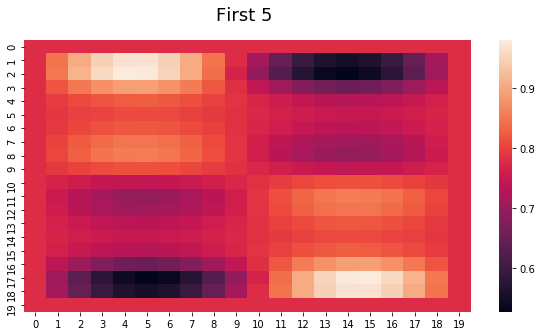

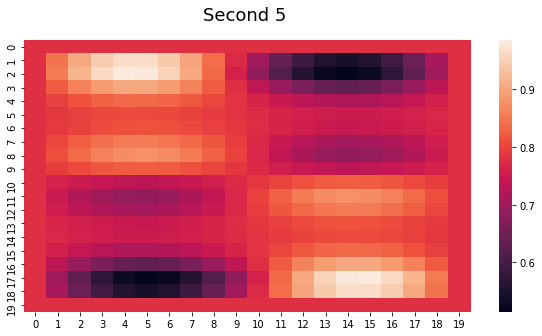

In [26]:
k = 0
#############################################################
for i in range(0,10,1):
    fig, ax = plt.subplots(figsize = (12, 7))
    title = "Energy landscape of graph indexed "+str(i)
    plt.title(title, fontsize = 18)
    ttl = ax.title
    ttl.set_position([0.5, 1.05])
    sns.heatmap(sorted_datas[k][i], ax = ax)
    plt.show()
    #datas.append(data)
    
########################################################################

for g in sorted_graphs[k]:
    degree_sequence = [d for n, d in g.degree()] 
    print(degree_sequence)
    
###########################################################################
first_half = find_av_datas(sorted_datas[k][:5])
second_half = find_av_datas(sorted_datas[k][5:])

fig, ax = plt.subplots(figsize = (10,5))
title = "First 5 "
plt.title(title, fontsize = 18)
ttl = ax.title
ttl.set_position([0.5, 1.05])
sns.heatmap(first_half, ax = ax)
plt.show()


fig, ax = plt.subplots(figsize = (10,5))
title = "Second 5 "
plt.title(title, fontsize = 18)
ttl = ax.title
ttl.set_position([0.5, 1.05])
sns.heatmap(second_half, ax = ax)
plt.show()


# 40 

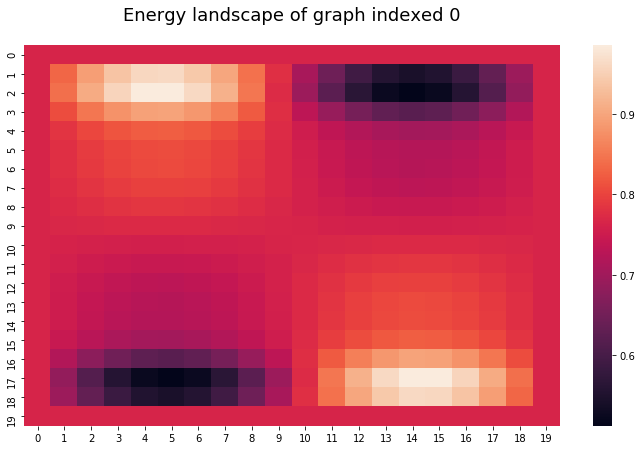

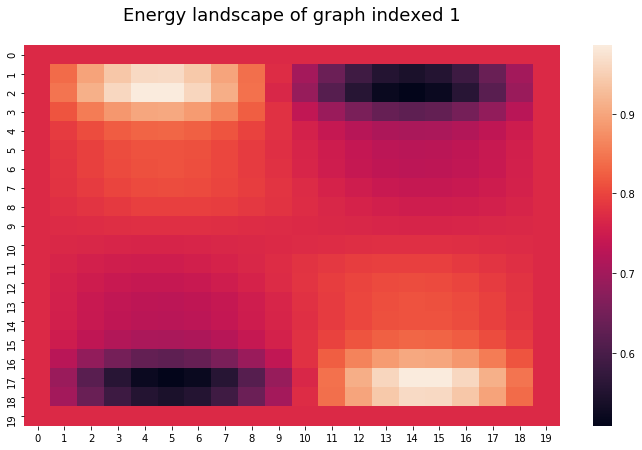

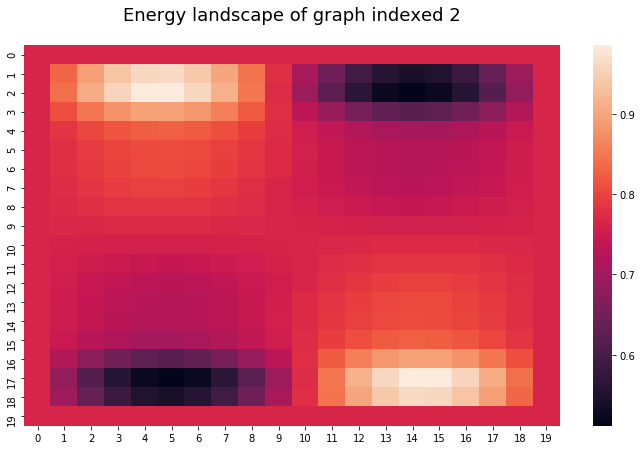

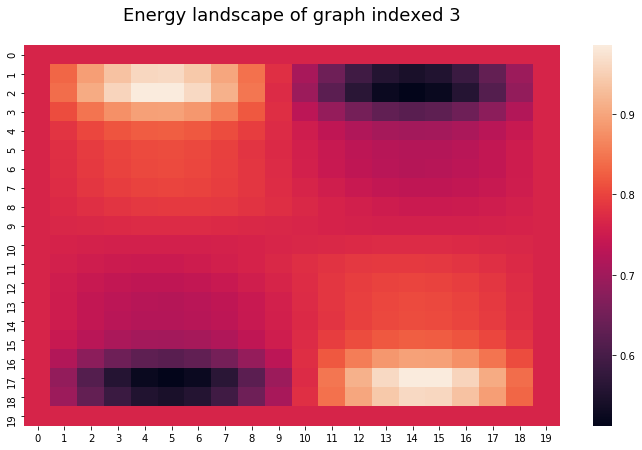

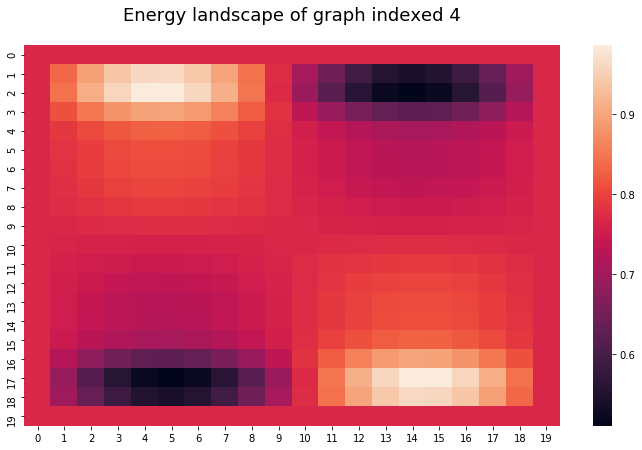

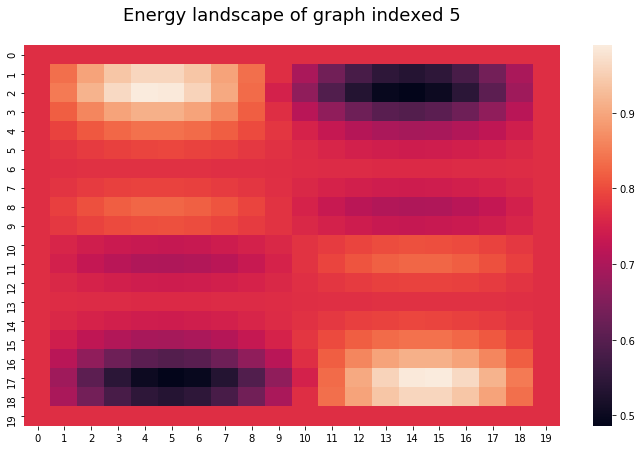

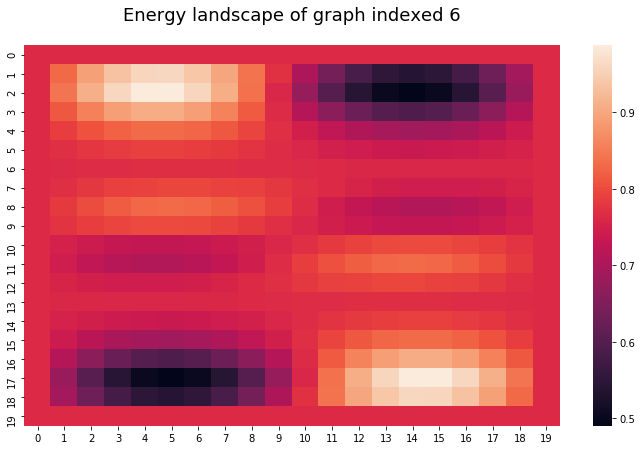

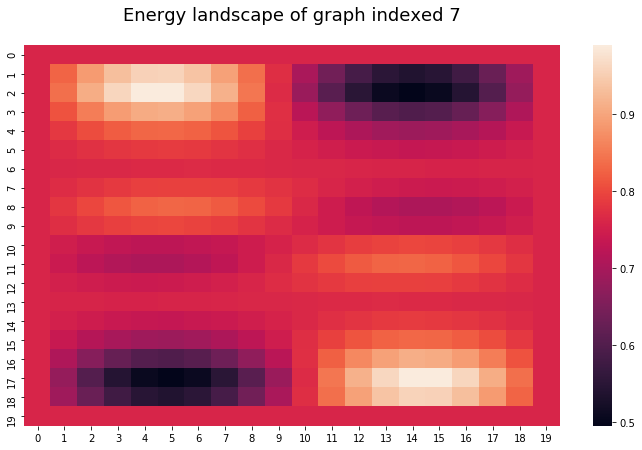

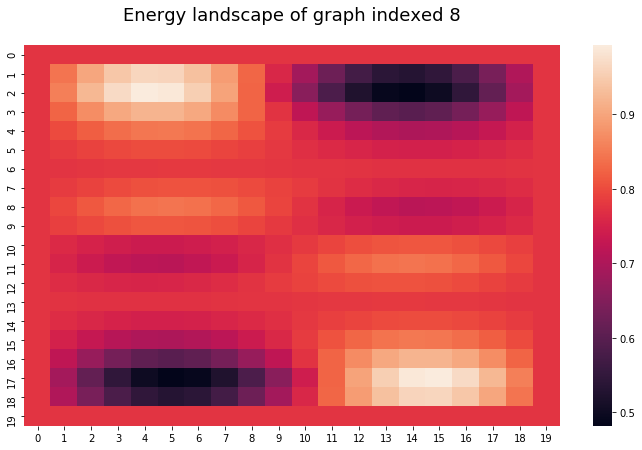

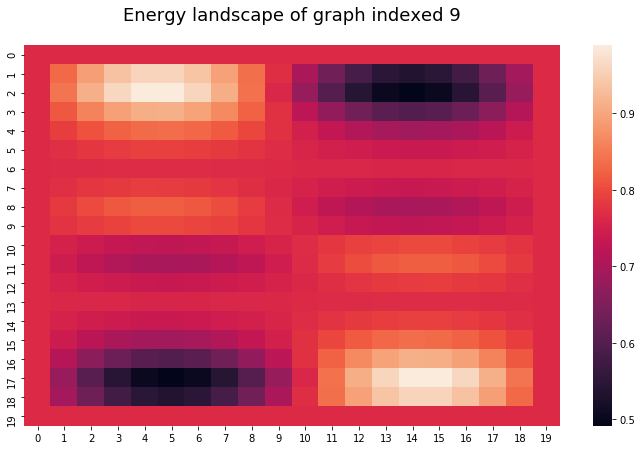

[4, 4, 2, 4, 6, 4, 4, 4, 3, 3, 5, 1, 5, 1, 3, 1, 1, 5, 3, 5]
[4, 4, 2, 4, 6, 4, 4, 4, 3, 3, 5, 1, 5, 1, 3, 1, 1, 5, 3, 5]
[4, 4, 2, 4, 6, 4, 4, 4, 3, 3, 5, 1, 5, 1, 3, 1, 1, 5, 3, 5]
[4, 4, 2, 4, 6, 4, 4, 4, 3, 3, 5, 1, 5, 1, 3, 1, 1, 5, 3, 5]
[4, 4, 2, 4, 6, 4, 4, 4, 3, 3, 5, 1, 5, 1, 3, 1, 1, 5, 3, 5]
[2, 2, 4, 4, 2, 4, 2, 2, 5, 3, 1, 3, 5, 5, 5, 3, 5, 5, 1, 1]
[2, 2, 4, 4, 2, 4, 2, 2, 5, 3, 1, 3, 5, 5, 5, 3, 5, 5, 1, 1]
[2, 2, 4, 4, 2, 4, 2, 2, 5, 3, 1, 3, 5, 5, 5, 3, 5, 5, 1, 1]
[2, 2, 4, 4, 2, 4, 2, 2, 5, 3, 1, 3, 5, 5, 5, 3, 5, 5, 1, 1]
[2, 2, 4, 4, 2, 4, 2, 2, 5, 3, 1, 3, 5, 5, 5, 3, 5, 5, 1, 1]


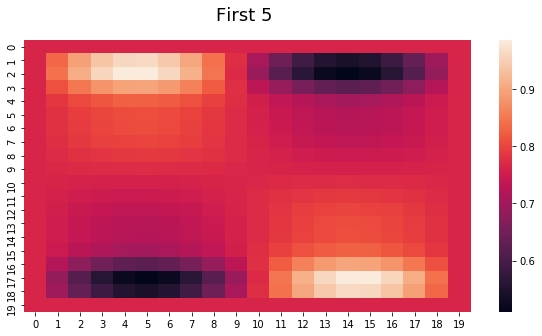

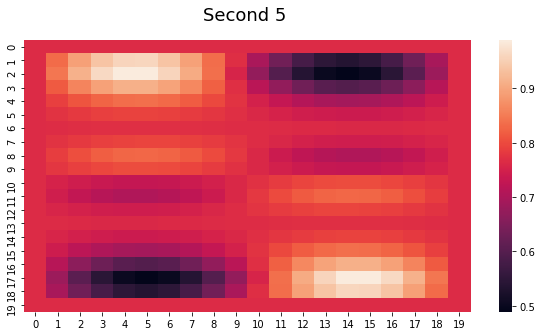

In [27]:
k = 1
#############################################################
for i in range(0,10,1):
    fig, ax = plt.subplots(figsize = (12, 7))
    title = "Energy landscape of graph indexed "+str(i)
    plt.title(title, fontsize = 18)
    ttl = ax.title
    ttl.set_position([0.5, 1.05])
    sns.heatmap(sorted_datas[k][i], ax = ax)
    plt.show()
    #datas.append(data)
    
########################################################################

for g in sorted_graphs[k]:
    degree_sequence = [d for n, d in g.degree()] 
    print(degree_sequence)
    
###########################################################################
first_half = find_av_datas(sorted_datas[k][:5])
second_half = find_av_datas(sorted_datas[k][5:])

fig, ax = plt.subplots(figsize = (10, 5))
title = "First 5 "
plt.title(title, fontsize = 18)
ttl = ax.title
ttl.set_position([0.5, 1.05])
sns.heatmap(first_half, ax = ax)
plt.show()


fig, ax = plt.subplots(figsize = (10, 5))
title = "Second 5 "
plt.title(title, fontsize = 18)
ttl = ax.title
ttl.set_position([0.5, 1.05])
sns.heatmap(second_half, ax = ax)
plt.show()


# 50

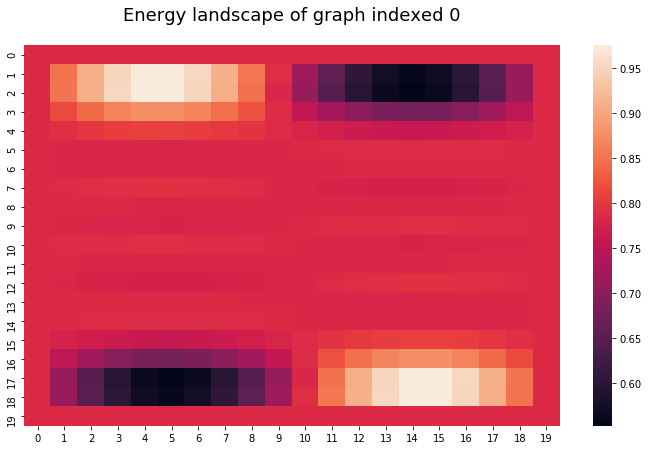

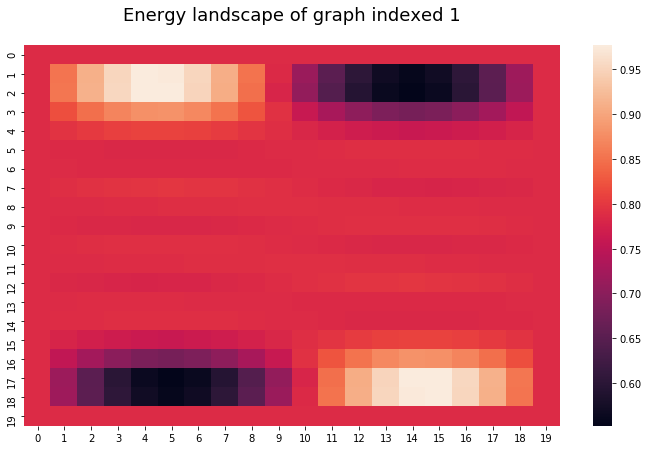

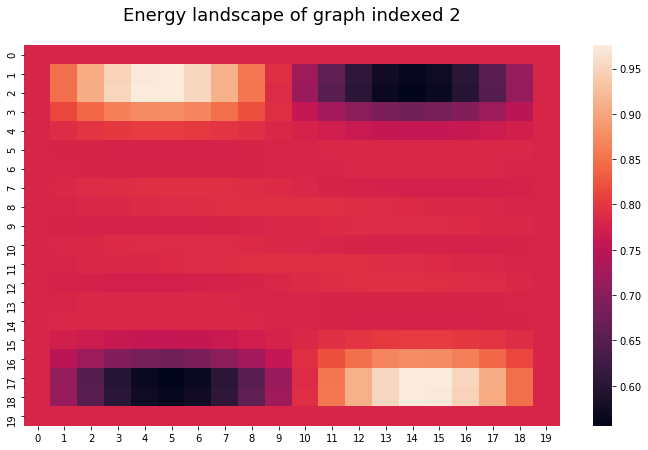

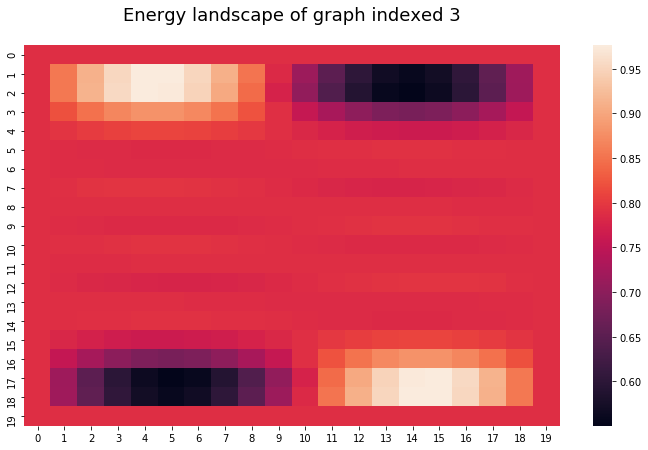

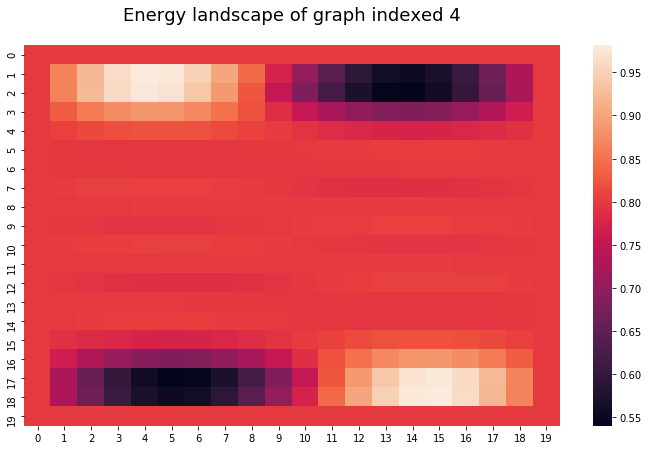

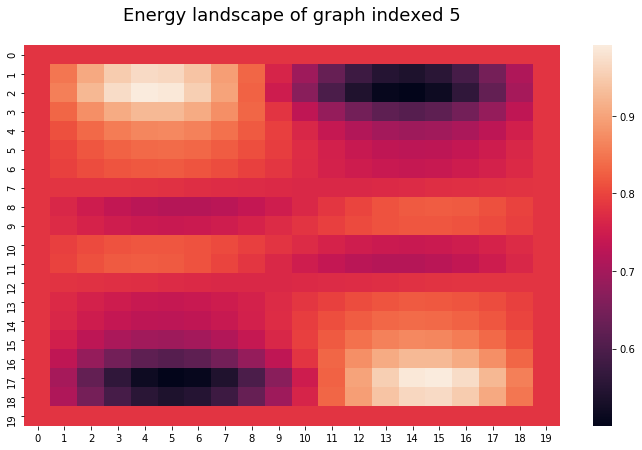

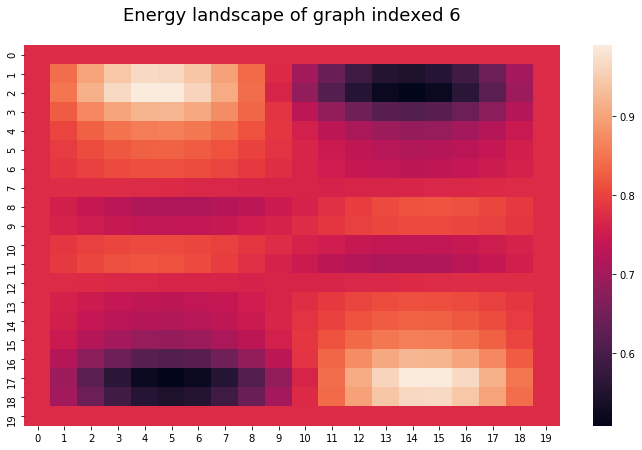

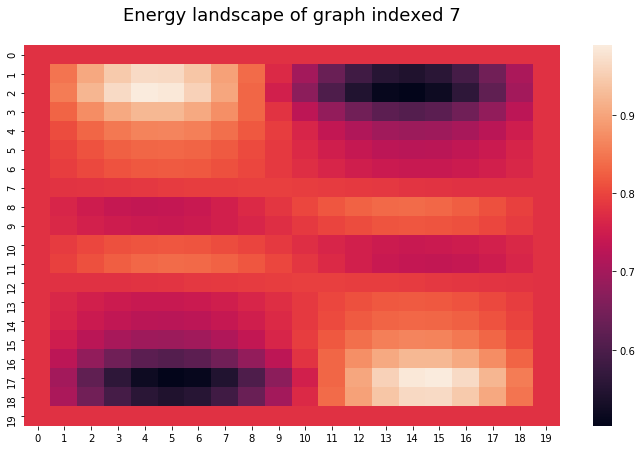

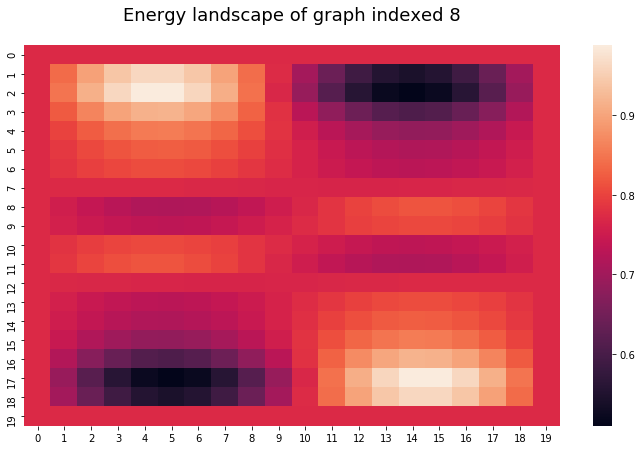

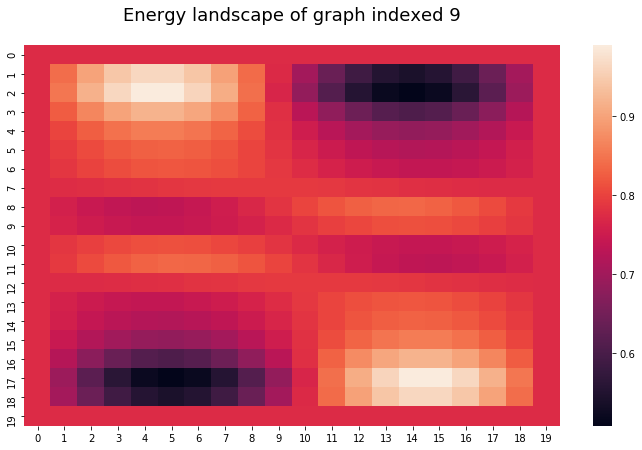

[4, 6, 2, 6, 6, 6, 2, 6, 2, 4, 5, 5, 3, 5, 3, 3, 3, 3, 5, 5]
[4, 6, 2, 6, 6, 6, 2, 6, 2, 4, 5, 5, 3, 5, 3, 3, 3, 3, 5, 5]
[4, 6, 2, 6, 6, 6, 2, 6, 2, 4, 5, 5, 3, 5, 3, 3, 3, 3, 5, 5]
[4, 6, 2, 6, 6, 6, 2, 6, 2, 4, 5, 5, 3, 5, 3, 3, 3, 3, 5, 5]
[4, 6, 2, 6, 6, 6, 2, 6, 2, 4, 5, 5, 3, 5, 3, 3, 3, 3, 5, 5]
[4, 6, 2, 6, 6, 6, 4, 4, 2, 2, 3, 5, 3, 3, 3, 1, 1, 1, 1, 1]
[4, 6, 2, 6, 6, 6, 4, 4, 2, 2, 3, 5, 3, 3, 3, 1, 1, 1, 1, 1]
[4, 6, 2, 6, 6, 6, 4, 4, 2, 2, 3, 5, 3, 3, 3, 1, 1, 1, 1, 1]
[4, 6, 2, 6, 6, 6, 4, 4, 2, 2, 3, 5, 3, 3, 3, 1, 1, 1, 1, 1]
[4, 6, 2, 6, 6, 6, 4, 4, 2, 2, 3, 5, 3, 3, 3, 1, 1, 1, 1, 1]


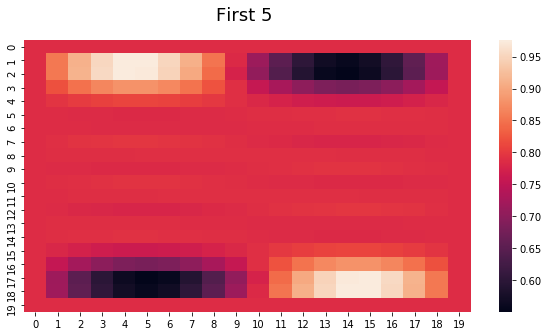

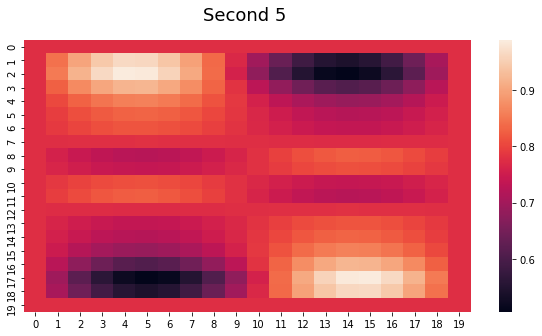

In [28]:
k = 2
#############################################################
for i in range(0,10,1):
    fig, ax = plt.subplots(figsize = (12, 7))
    title = "Energy landscape of graph indexed "+str(i)
    plt.title(title, fontsize = 18)
    ttl = ax.title
    ttl.set_position([0.5, 1.05])
    sns.heatmap(sorted_datas[k][i], ax = ax)
    plt.show()
    #datas.append(data)
    
########################################################################

for g in sorted_graphs[k]:
    degree_sequence = [d for n, d in g.degree()] 
    print(degree_sequence)
    
###########################################################################
first_half = find_av_datas(sorted_datas[k][:5])
second_half = find_av_datas(sorted_datas[k][5:])

fig, ax = plt.subplots(figsize = (10, 5))
title = "First 5 "
plt.title(title, fontsize = 18)
ttl = ax.title
ttl.set_position([0.5, 1.05])
sns.heatmap(first_half, ax = ax)
plt.show()


fig, ax = plt.subplots(figsize = (10,5))
title = "Second 5 "
plt.title(title, fontsize = 18)
ttl = ax.title
ttl.set_position([0.5, 1.05])
sns.heatmap(second_half, ax = ax)
plt.show()


# 60 

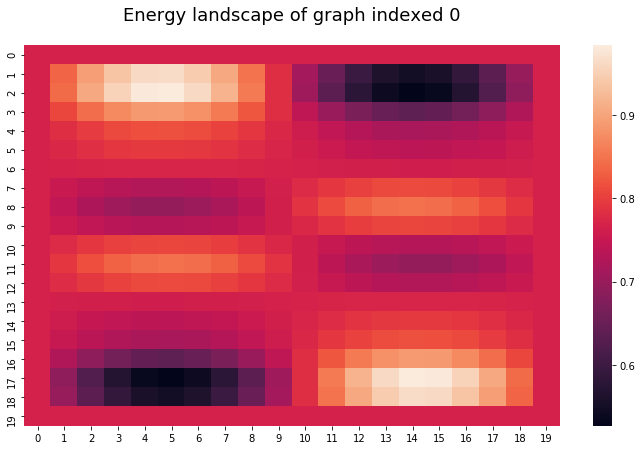

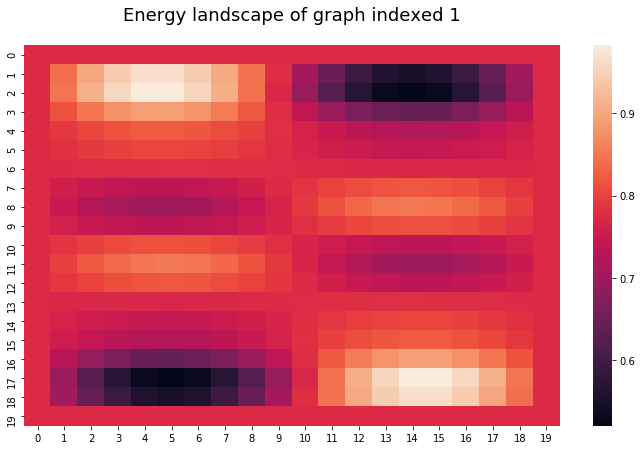

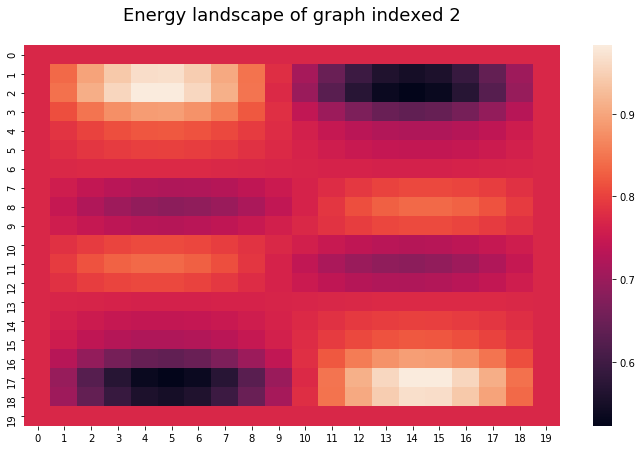

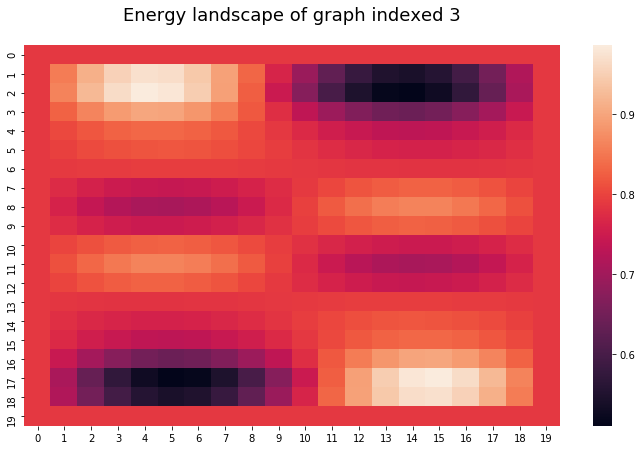

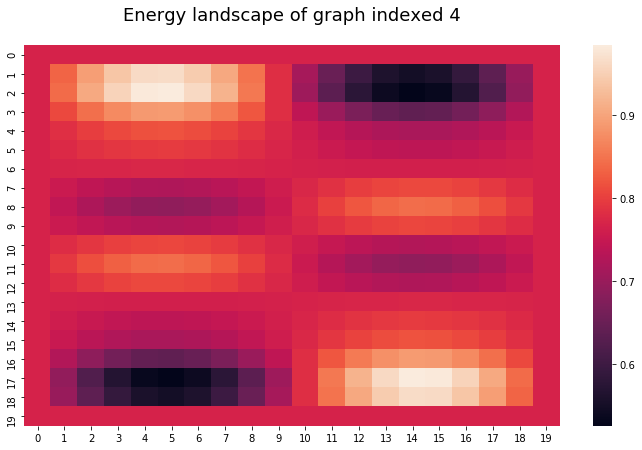

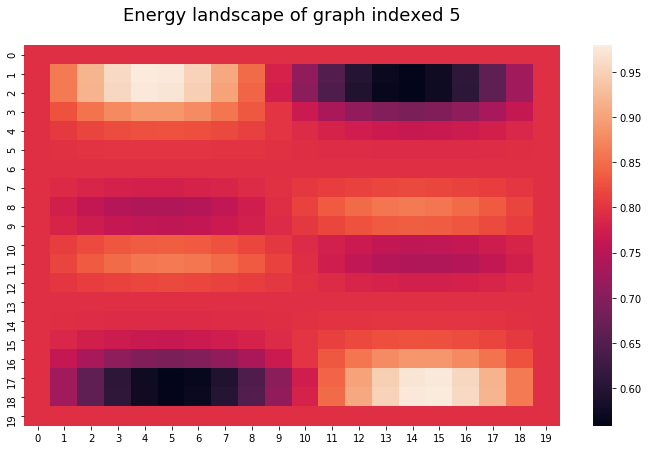

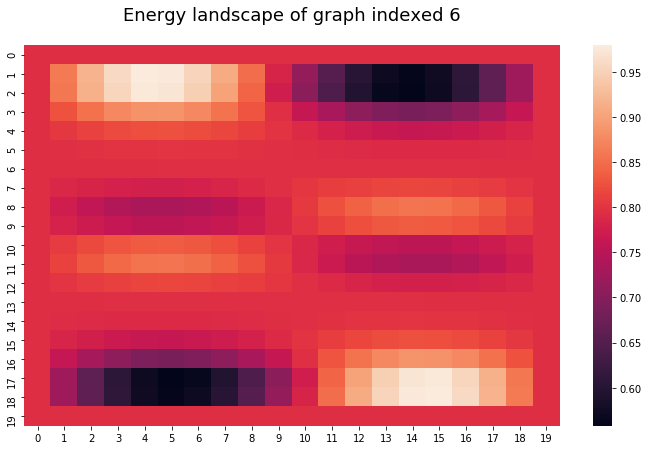

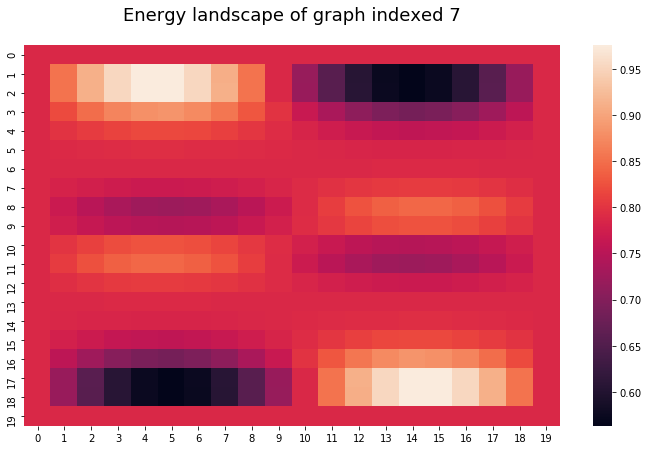

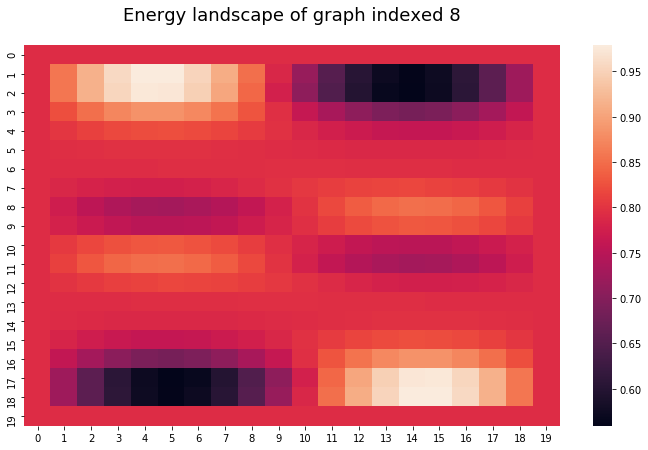

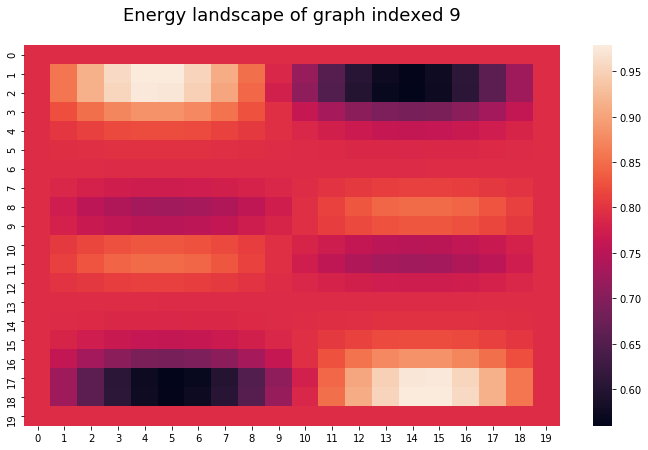

[4, 4, 2, 4, 6, 4, 4, 4, 4, 4, 6, 2, 5, 1, 3, 1, 1, 5, 3, 5]
[4, 4, 2, 4, 6, 4, 4, 4, 4, 4, 6, 2, 5, 1, 3, 1, 1, 5, 3, 5]
[4, 4, 2, 4, 6, 4, 4, 4, 4, 4, 6, 2, 5, 1, 3, 1, 1, 5, 3, 5]
[4, 4, 2, 4, 6, 4, 4, 4, 4, 4, 6, 2, 5, 1, 3, 1, 1, 5, 3, 5]
[4, 4, 2, 4, 6, 4, 4, 4, 4, 4, 6, 2, 5, 1, 3, 1, 1, 5, 3, 5]
[2, 4, 6, 6, 2, 6, 6, 6, 4, 6, 6, 2, 3, 3, 5, 1, 3, 3, 5, 5]
[2, 4, 6, 6, 2, 6, 6, 6, 4, 6, 6, 2, 3, 3, 5, 1, 3, 3, 5, 5]
[2, 4, 6, 6, 2, 6, 6, 6, 4, 6, 6, 2, 3, 3, 5, 1, 3, 3, 5, 5]
[2, 4, 6, 6, 2, 6, 6, 6, 4, 6, 6, 2, 3, 3, 5, 1, 3, 3, 5, 5]
[2, 4, 6, 6, 2, 6, 6, 6, 4, 6, 6, 2, 3, 3, 5, 1, 3, 3, 5, 5]


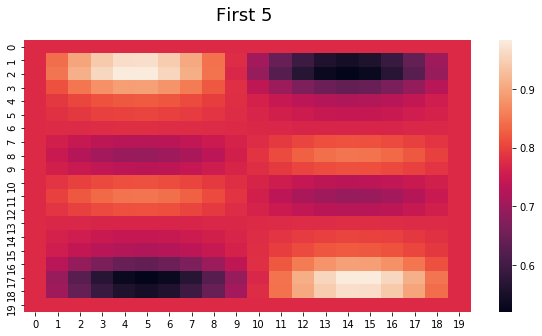

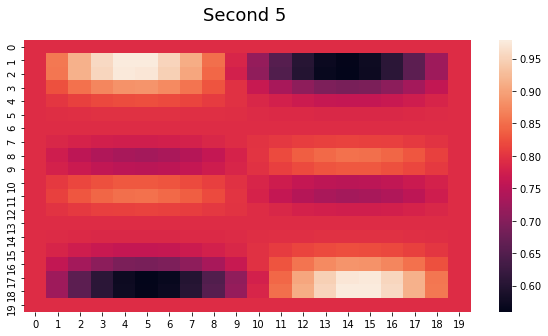

In [29]:
k = 3
#############################################################
for i in range(0,10,1):
    fig, ax = plt.subplots(figsize = (12, 7))
    title = "Energy landscape of graph indexed "+str(i)
    plt.title(title, fontsize = 18)
    ttl = ax.title
    ttl.set_position([0.5, 1.05])
    sns.heatmap(sorted_datas[k][i], ax = ax)
    plt.show()
    #datas.append(data)
    
########################################################################

for g in sorted_graphs[k]:
    degree_sequence = [d for n, d in g.degree()] 
    print(degree_sequence)
    
###########################################################################
first_half = find_av_datas(sorted_datas[k][:5])
second_half = find_av_datas(sorted_datas[k][5:])

fig, ax = plt.subplots(figsize = (10, 5))
title = "First 5 "
plt.title(title, fontsize = 18)
ttl = ax.title
ttl.set_position([0.5, 1.05])
sns.heatmap(first_half, ax = ax)
plt.show()


fig, ax = plt.subplots(figsize = (10,5))
title = "Second 5 "
plt.title(title, fontsize = 18)
ttl = ax.title
ttl.set_position([0.5, 1.05])
sns.heatmap(second_half, ax = ax)
plt.show()
